# Self Organizing Maps

In [1]:
import numpy as np 
import matplotlib as plt
import pandas as pd

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

http://archive.ics.uci.edu/ml/datasets/statlog+(australian+credit+approval)

This is to solve fraud detection. We are working as a Deep Learning
Scientist for a bank. Customers are applying for cards. We need to find 
out customer who can potentially cheat. We are going to use unsupervised
deep learning and identify the patterns and then do the analysis.

This dataset is taken from UCI dataset library. Statlog (Australian
Credit Approval) Data set. 

When we think about they are outliers in SOM. Question is how can
we deduct those outliers. Outliers will be far from its neighbourhood

In [3]:
dataset = pd.read_csv('Credit_Card_Applications.csv')

#### Attribute Information:

There are 6 numerical and 8 categorical attributes. The labels have been changed for the convenience of the statistical algorithms. For example, attribute 4 originally had 3 labels p,g,gg and these have been changed to labels 1,2,3. 

- A1: 0,1 CATEGORICAL (formerly: a,b)  
- A2: continuous. 
- A3: continuous. 
- A4: 1,2,3 CATEGORICAL (formerly: p,g,gg) 
- A5: 1, 2,3,4,5, 6,7,8,9,10,11,12,13,14 CATEGORICAL (formerly: ff,d,i,k,j,aa,m,c,w, e, q, r,cc, x) 
- A6: 1, 2,3, 4,5,6,7,8,9 CATEGORICAL (formerly: ff,dd,j,bb,v,n,o,h,z) 
- A7: continuous. 
- A8: 1, 0 CATEGORICAL (formerly: t, f) 
- A9: 1, 0	CATEGORICAL (formerly: t, f) 
- A10: continuous. 
- A11: 1, 0	CATEGORICAL (formerly t, f) 
- A12: 1, 2, 3 CATEGORICAL (formerly: s, g, p) 
- A13: continuous. 
- A14: continuous. 
- A15: 1,2 class attribute (formerly: +,-)

In [4]:
dataset.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In the NN we are going to get output neuron that is closest to the given
customer (row). This neuron is called winning node.  For each customer
we would have one winning node. Then we use neighbourhood function 
to update the weight of the neighbourhood nodes. We do this for all
all customers.  Post that we repeat this multiple times (I think that is epoc)

Now we identify the frauds by identifying the outliers. Because frauds are basically
far from the rules. Rules must be respected while appying for credit card.
To find the outlying neurons we need to find the mean inter neuron distance. We need
to find out the euclidean distance. Mean of this neuron and mean of the neighbour hood.
We need to define the neighbourhood. For each of those neurons we need to find 
out the euclidean distance. By doing that we can detect ouliers. Outliers are from
the neighbourhood. Then we do the inverse mapping to find out which customers are the outliers

Now lets split the input data as two sets. One all columns from Customer Id till previous to class
Class 0 means application is rejected & 1 means approved. Then we can clearly find out 
whose application is approved / rejected.

In [5]:
X = dataset.iloc[:,:-1].values 
y = dataset.iloc[:,-1].values 

In [6]:
X
y

array([[  1.57761560e+07,   1.00000000e+00,   2.20800000e+01, ...,
          2.00000000e+00,   1.00000000e+02,   1.21300000e+03],
       [  1.57395480e+07,   0.00000000e+00,   2.26700000e+01, ...,
          2.00000000e+00,   1.60000000e+02,   1.00000000e+00],
       [  1.56628540e+07,   0.00000000e+00,   2.95800000e+01, ...,
          2.00000000e+00,   2.80000000e+02,   1.00000000e+00],
       ..., 
       [  1.56754500e+07,   0.00000000e+00,   1.88300000e+01, ...,
          2.00000000e+00,   1.00000000e+02,   1.00000000e+00],
       [  1.57764940e+07,   0.00000000e+00,   2.74200000e+01, ...,
          2.00000000e+00,   1.20000000e+02,   1.20000000e+01],
       [  1.55924120e+07,   1.00000000e+00,   4.10000000e+01, ...,
          1.00000000e+00,   5.60000000e+02,   1.00000000e+00]])

array([0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1,

In [7]:
# Feature Scaling
#We need this as high computation is needed
#We want to get all values between 0 & 1
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
X = sc.fit_transform(X)
X

array([[  8.42681467e-01,   1.00000000e+00,   1.25263158e-01, ...,
          5.00000000e-01,   5.00000000e-02,   1.21200000e-02],
       [  6.96090562e-01,   0.00000000e+00,   1.34135338e-01, ...,
          5.00000000e-01,   8.00000000e-02,   0.00000000e+00],
       [  3.88981656e-01,   0.00000000e+00,   2.38045113e-01, ...,
          5.00000000e-01,   1.40000000e-01,   0.00000000e+00],
       ..., 
       [  4.39420332e-01,   0.00000000e+00,   7.63909774e-02, ...,
          5.00000000e-01,   5.00000000e-02,   0.00000000e+00],
       [  8.44034934e-01,   0.00000000e+00,   2.05563910e-01, ...,
          5.00000000e-01,   6.00000000e-02,   1.10000000e-04],
       [  1.06907888e-01,   1.00000000e+00,   4.09774436e-01, ...,
          0.00000000e+00,   2.80000000e-01,   0.00000000e+00]])

Training the SOM
We are going to use excellent SOM developed by Giuseppe Vettigli

URL: https://pypi.python.org/pypi/MiniSom/1.0

Numpy based implementation
As the license is Creative Common hence we can use it

In the working folder we need to take that minisom.py

In [8]:
from minisom import MiniSom

We don't use y value here as of now while using SOM

Here we need to select as many observation as possible. But since we have only limited
number of credit card applications we are going to select 10 X 10 grid
input_len is number of features in our X that we have selected. Customer Id don't need to be considered
But to uniquely identify fradulent customer we need that value as well. Hence input length is

14 + 1
Higher the learning rate faster the convergence. Lower the learning rate then it slowly converges
Lets keep the default value of 0.5. Sigma, decay etc lets leave it with default

In [32]:
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)

In [10]:
som.random_weights_init(X)
so m.train_random(data = X, num_iteration = 100)

In [11]:
# Visualizing the results 
from pylab import bone, pcolor, colorbar, plot, show

We are going to put the Mean of neuron 
Different color represents different range of MID values. We use
distance_map method. This returns all the means and the neuron
distances in one matrix.  This is for all winning nodes. We need
to transpose this by using .T

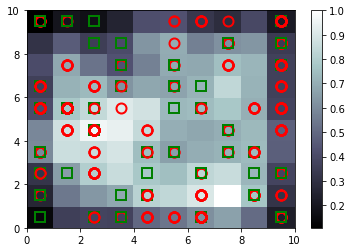

In [12]:
%matplotlib inline
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r','g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0]+0.5, 
         w[1]+0.5, 
         markers[y[i]],
         markeredgecolor = colors[y[i]], 
         markerfacecolor = 'None', 
         markersize = 10, 
         markeredgewidth = 2)
show;

In [30]:
# Finding the frauds
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(6,3)], mappings[(9,3)]), axis = 0)
frauds = sc.inverse_transform(frauds)

In [31]:
frauds

array([[  1.57157500e+07,   1.00000000e+00,   2.01700000e+01,
          8.17000000e+00,   2.00000000e+00,   6.00000000e+00,
          4.00000000e+00,   1.96000000e+00,   1.00000000e+00,
          1.00000000e+00,   1.40000000e+01,   0.00000000e+00,
          2.00000000e+00,   6.00000000e+01,   1.59000000e+02],
       [  1.57892010e+07,   1.00000000e+00,   1.85000000e+01,
          2.00000000e+00,   2.00000000e+00,   3.00000000e+00,
          4.00000000e+00,   1.50000000e+00,   1.00000000e+00,
          1.00000000e+00,   2.00000000e+00,   0.00000000e+00,
          2.00000000e+00,   1.20000000e+02,   3.01000000e+02],
       [  1.56897810e+07,   1.00000000e+00,   3.92500000e+01,
          9.50000000e+00,   2.00000000e+00,   7.00000000e+00,
          4.00000000e+00,   6.50000000e+00,   1.00000000e+00,
          1.00000000e+00,   1.40000000e+01,   0.00000000e+00,
          2.00000000e+00,   2.40000000e+02,   4.60800000e+03],
       [  1.57358370e+07,   1.00000000e+00,   5.25000000e+01,
     